In [1]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

test_data =  "..\data\Test_data_disease.csv"
df_test = pd.read_csv(test_data)

X,y = df_test.drop("cardio", axis = "columns"), df_test["cardio"]

model = joblib.load("voting_clf_model.pkl")
 


In [2]:
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(criterion='entropy',
                                                                      max_features='log2',
                                                                      n_estimators=200)),
                                              ('lr',
                                               LogisticRegression(C=0.026366508987303583,
                                                                  penalty='l1',
                                                                  solver='saga')),
                                              ('bn', BernoulliNB(alpha=10))],
                                  voting='soft'))])

In [3]:
X

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,female,male
0,45072,49.84,120,80,1,1,0,0,1,31.20,1,0
1,87510,39.33,120,70,1,1,0,0,1,21.83,1,0
2,10492,43.96,140,90,1,1,0,0,0,26.79,0,1
3,7808,46.17,120,80,1,1,0,0,1,39.26,1,0
4,72009,53.78,120,80,1,1,0,0,1,24.90,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,73213,53.98,120,80,1,1,0,0,1,23.77,0,1
96,17978,51.20,120,80,1,1,0,0,1,21.23,1,0
97,25580,61.66,140,90,1,1,0,0,1,32.41,1,0
98,96457,55.81,120,80,1,1,0,0,1,30.93,1,0


In [4]:
y.value_counts()

0    63
1    37
Name: cardio, dtype: int64

In [5]:
y_pred = model.predict(X)

In [6]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [7]:
proba = model.predict_proba(X)

proba_class_0 = proba[:,0]
proba_class_1 = proba[:,1]

In [8]:
proba

array([[0.78992331, 0.21007669],
       [0.82456063, 0.17543937],
       [0.2493958 , 0.7506042 ],
       [0.73513482, 0.26486518],
       [0.74087738, 0.25912262],
       [0.14117418, 0.85882582],
       [0.19302514, 0.80697486],
       [0.48551584, 0.51448416],
       [0.6892222 , 0.3107778 ],
       [0.76831717, 0.23168283],
       [0.85153569, 0.14846431],
       [0.19053917, 0.80946083],
       [0.66936871, 0.33063129],
       [0.0904673 , 0.9095327 ],
       [0.71135744, 0.28864256],
       [0.90069998, 0.09930002],
       [0.69245952, 0.30754048],
       [0.6291282 , 0.3708718 ],
       [0.76746643, 0.23253357],
       [0.53214318, 0.46785682],
       [0.1520247 , 0.8479753 ],
       [0.81157383, 0.18842617],
       [0.41716291, 0.58283709],
       [0.09929265, 0.90070735],
       [0.18570121, 0.81429879],
       [0.11223496, 0.88776504],
       [0.11992711, 0.88007289],
       [0.12103839, 0.87896161],
       [0.87722948, 0.12277052],
       [0.71820263, 0.28179737],
       [0.

In [9]:
data = {"probability class 0" : proba_class_0,
        "probability class 1" : proba_class_1,
        "prediction" : y_pred}

df_predictions = pd.DataFrame(data)

Accuracy score:  0.77
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        56
           1       0.78      0.66      0.72        44

    accuracy                           0.77       100
   macro avg       0.77      0.76      0.76       100
weighted avg       0.77      0.77      0.77       100



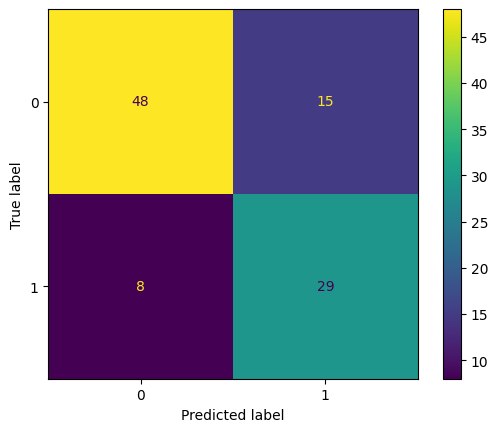

In [10]:
print(f"Accuracy score:  {model.score(X,y)}" )
print(classification_report(y_pred, y))
cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(cm).plot();

In [11]:
df_predictions.head()

,probability class 0,probability class 1,prediction
0,0.789923,0.210077,0
1,0.824561,0.175439,0
2,0.249396,0.750604,1
3,0.735135,0.264865,0
4,0.740877,0.259123,0
